In [1]:
import numpy as np
import import_ipynb
import pandas_datareader as pdr
import pandas as pd
import datetime

import matplotlib.pyplot as plt

import sys  
sys.path.insert(0, 'C:/Users/dorot/Documents/Thesis/Code/Data')
import modularized_dataeval as eval

In [2]:
paths = np.load("GAN_paths.npy")
arr = paths[0]

In [3]:
ticker = "^GSPC"
start=datetime.date(1980, 1, 1)
end=datetime.date(2019, 1, 1)
sp500 = pdr.get_data_yahoo(ticker, start, end)
sp500['Log Return'] = np.log(sp500['Adj Close']) - np.log(sp500['Adj Close'].shift(1))
sp500.dropna(inplace=True)
sp500 = sp500[:len(arr)]

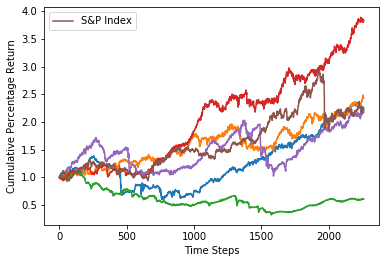

In [41]:
g1, = plt.plot((1+arr).cumprod()[:2263])
g2, = plt.plot((1+paths[1]).cumprod()[:2263])
g3, = plt.plot((1+paths[11]).cumprod()[:2263])
g4, = plt.plot((1+paths[8]).cumprod()[:2263])
g5, = plt.plot((1+paths[10]).cumprod()[:2263])
spy, = plt.plot((1+sp500['Log Return'].to_numpy()).cumprod()[:2263], label="S&P index")
plt.legend([spy], ['S&P Index'])
plt.ylabel("Cumulative Percentage Return")
plt.xlabel("Time Steps")
plt.show()

In [6]:
eval.comparison_summary(arr, sp500['Log Return'].to_numpy())

mean is:  0.00032101187
standard deviation is:  0.012419968
skew is:  [-0.6102829]
kurtosis is:  [15.395466]
mean is:  0.00031138835318263126
standard deviation is:  0.011547670663600502
skew is:  -1.1746232005245532
kurtosis is:  26.414315745758454


C:/Users/dorot/Documents/Thesis/Code/Data\modularized_dataeval.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([np.mean(arr), np.std(arr), skew(arr), kurtosis(arr)])
c:\users\dorot\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


(array([9.62352071080851e-06, 0.0008722972485370063,
        array([0.56434035], dtype=float32),
        array([11.01885], dtype=float32)], dtype=object),
 0.04970358647456321,
 0.062243163197472196,
 0.03835332098302325,
 0.15802649539063607)

In [5]:
eval.get_basic_stats(arr)

mean is:  2.1325868e-05
standard deviation is:  0.0075717196
skew is:  0.03427019715309143
kurtosis is:  6.418982029729747


(2.1325868e-05, 0.0075717196, 0.03427019715309143, 6.418982029729747)

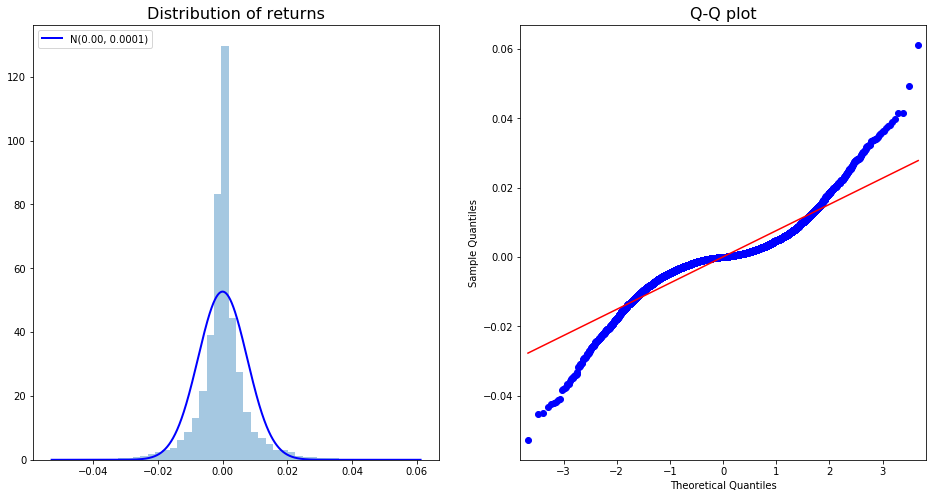

In [6]:
eval.plot_hist_qq(arr)

In [33]:
eval.compute_jarque_bera(arr)

The Jarque-Bera test statistic value is 14065.673586128301 with probability of 0.0


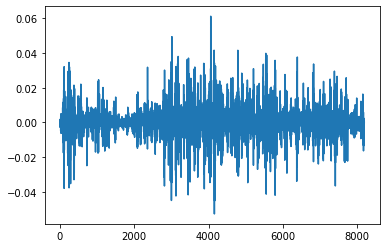

In [26]:
eval.plot_volclusters(arr)

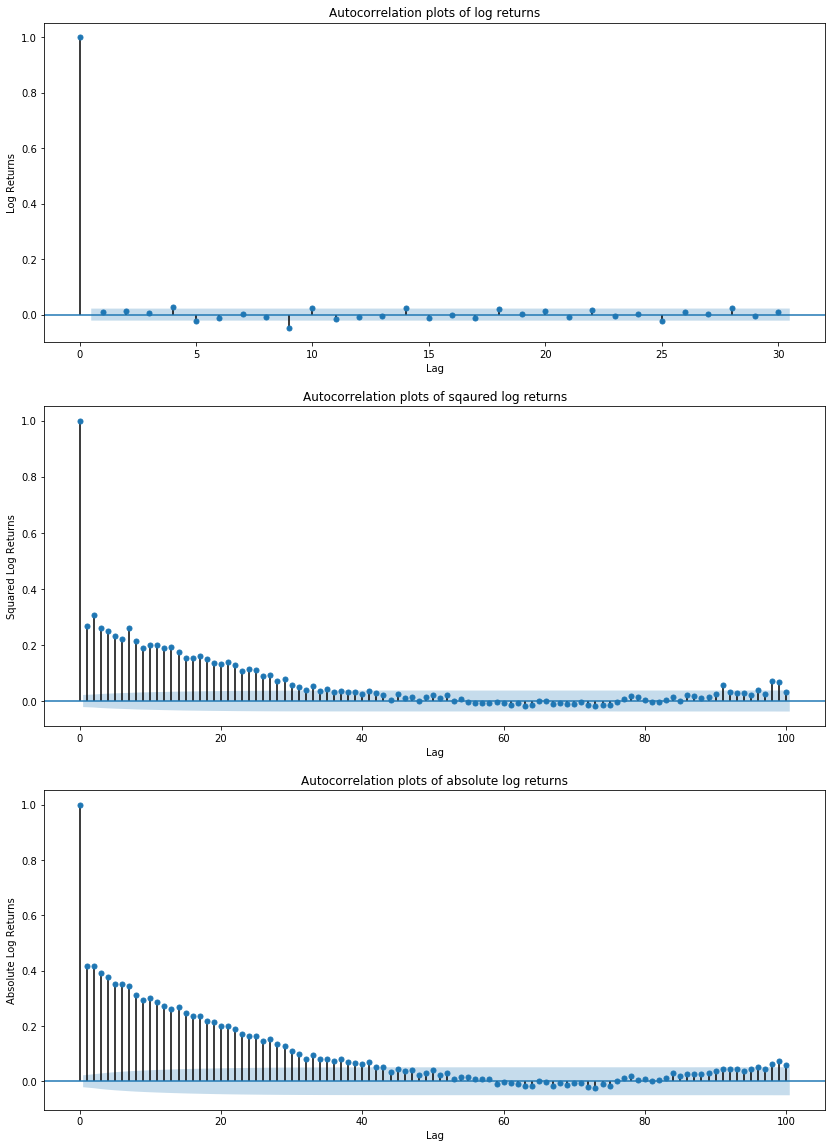

In [27]:
eval.plot_autocorrelation(arr)

In [28]:
eval.compute_volcluster_ratio(arr)

1.8924026414710124

In [34]:
eval.KS_test(sp500['Log Return'].to_numpy(), arr)

Ks_2sampResult(statistic=0.152099609375, pvalue=4.786177697872026e-83)

In [30]:
temp = sp500['Log Return'].to_numpy()
eval.KS_test(temp[:4000], temp[4000:8000])

Ks_2sampResult(statistic=0.06525, pvalue=7.953450708579859e-08)